In [228]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [229]:
share_num = 200000
max_car = -0.01 * share_num

In [230]:
# Use monte carlo to simulate the expected utility of always buy without hiring the expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

# Convert log returns to actual price ratios and calculate profit
price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
profit = price_ratios - 1  # (final_price/initial_price - 1)
profit = profit * share_num  # Scale up to the number of shares

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(profit, 5)
tail_values = profit[profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

(array([2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.500e+01, 1.200e+01, 1.300e+01, 2.000e+01, 2.600e+01, 4.500e+01,
        4.700e+01, 4.900e+01, 8.200e+01, 9.100e+01, 1.100e+02, 1.670e+02,
        1.840e+02, 1.900e+02, 2.860e+02, 3.140e+02, 4.560e+02, 4.590e+02,
        5.440e+02, 6.980e+02, 7.920e+02, 8.480e+02, 1.059e+03, 1.179e+03,
        1.328e+03, 1.545e+03, 1.666e+03, 1.883e+03, 2.102e+03, 2.236e+03,
        2.466e+03, 2.589e+03, 2.818e+03, 2.903e+03, 3.050e+03, 3.232e+03,
        3.304e+03, 3.428e+03, 3.352e+03, 3.373e+03, 3.393e+03, 3.437e+03,
        3.374e+03, 3.285e+03, 3.197e+03, 2.963e+03, 2.983e+03, 2.773e+03,
        2.674e+03, 2.439e+03, 2.273e+03, 2.119e+03, 1.990e+03, 1.855e+03,
        1.622e+03, 1.456e+03, 1.327e+03, 1.168e+03, 9.880e+02, 8.850e+02,
        7.490e+02, 6.950e+02, 5.830e+02, 4.770e+02, 4.470e+02, 3.310e+02,
        2.970e+02, 2.240e+02, 2.080e+02, 1.580e+02, 1.330e+02, 1.190e+02,
        8.100e+01, 6.300e+01, 5.600e+0

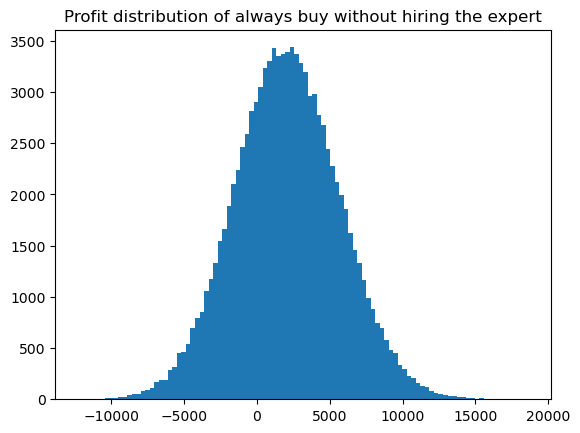

In [231]:
# plot the profit distribution
plt.title('Profit distribution of always buy without hiring the expert')
plt.hist(profit, bins=100)

In [232]:
# calculate the expected utility without risk
profit.mean()

2073.336237605381

In [233]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = profit.mean() 
    print(expected_utility)

cvar is -5281.932533413334
Maximum allowable cvar is -2000.0
Risk is too high, the expected utility is 0


In [234]:
# Conclusion: always buy is too risky, the expected utility is 0

In [235]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > 0.0028, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > 0.0028

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(actual_investment_profit, 5)
tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

actual_profit = profit - 1000  # Cost of hiring the expert

(array([1.0000e+00, 2.0000e+00, 8.0000e+00, 6.0000e+00, 9.0000e+00,
        1.8000e+01, 2.4000e+01, 4.2000e+01, 5.2000e+01, 5.2034e+04,
        9.9000e+01, 1.3700e+02, 2.5000e+02, 3.1900e+02, 3.7200e+02,
        4.8100e+02, 6.3800e+02, 7.2100e+02, 9.4600e+02, 9.1000e+02,
        1.1830e+03, 1.2590e+03, 1.4650e+03, 1.4960e+03, 1.5340e+03,
        1.7360e+03, 1.7270e+03, 1.8160e+03, 1.7750e+03, 1.7680e+03,
        1.7390e+03, 1.7630e+03, 1.7200e+03, 1.6890e+03, 1.6060e+03,
        1.4330e+03, 1.4770e+03, 1.3500e+03, 1.1670e+03, 1.2060e+03,
        1.1440e+03, 9.9500e+02, 9.8100e+02, 8.8300e+02, 8.0500e+02,
        7.8900e+02, 6.6400e+02, 5.9400e+02, 5.5500e+02, 5.2100e+02,
        4.7600e+02, 3.9700e+02, 3.8300e+02, 3.4100e+02, 2.9300e+02,
        2.5800e+02, 2.4700e+02, 2.1200e+02, 2.0200e+02, 1.8100e+02,
        1.2400e+02, 1.4600e+02, 1.1700e+02, 9.7000e+01, 1.0700e+02,
        8.8000e+01, 5.6000e+01, 6.2000e+01, 5.4000e+01, 3.0000e+01,
        3.2000e+01, 3.8000e+01, 3.0000e+01, 2.50

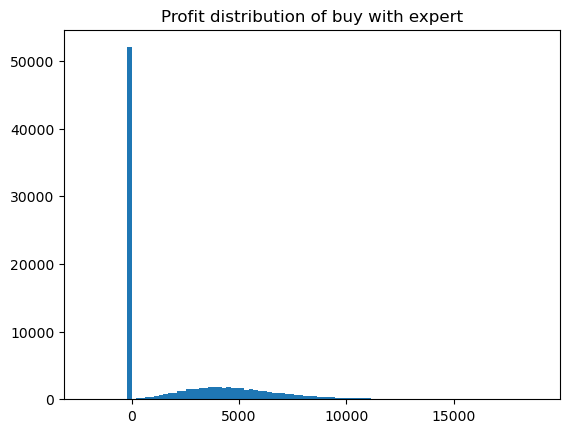

In [236]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 4.000e+00, 7.000e+00, 1.600e+01, 1.400e+01, 1.900e+01,
        2.100e+01, 2.600e+01, 3.900e+01, 4.800e+01, 8.100e+01, 1.070e+02,
        1.280e+02, 1.420e+02, 1.780e+02, 2.360e+02, 2.840e+02, 3.800e+02,
        4.330e+02, 5.090e+02, 6.220e+02, 7.090e+02, 9.170e+02, 9.960e+02,
        1.195e+03, 1.404e+03, 1.454e+03, 1.649e+03, 1.880e+03, 2.149e+03,
        2.242e+03, 2.446e+03, 2.601e+03, 2.777e+03, 2.976e+03, 3.084e+03,
        3.257e+03, 3.376e+03, 3.479e+03, 3.481e+03, 3.641e+03, 3.416e+03,
        3.451e+03, 3.468e+03, 3.239e+03, 3.238e+03, 3.254e+03, 2.911e+03,
        2.853e+03, 2.769e+03, 2.576e+03, 2.330e+03, 2.255e+03, 1.890e+03,
        1.790e+03, 1.624e+03, 1.482e+03, 1.234e+03, 1.166e+03, 9.240e+02,
        8.140e+02, 7.380e+02, 5.960e+02, 5.260e+02, 4.100e+02, 3.840e+02,
        3.220e+02, 2.630e+02, 2.030e+02, 1.740e+02, 1.600e+02, 1.250e+02,
        9.000e+01, 7.600e+01, 4.500e+0

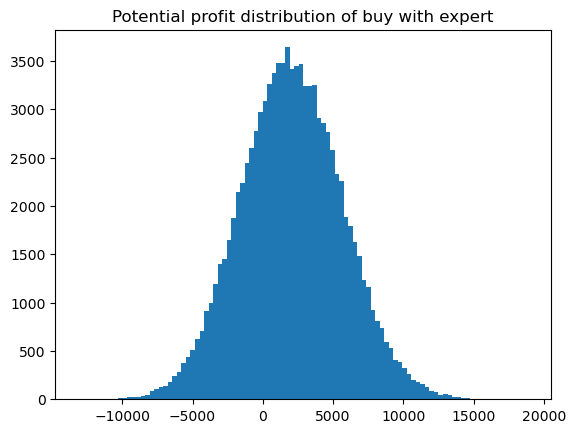

In [237]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)

(array([1.0000e+00, 2.0000e+00, 8.0000e+00, 6.0000e+00, 9.0000e+00,
        1.8000e+01, 2.4000e+01, 4.2000e+01, 5.2000e+01, 5.2034e+04,
        9.9000e+01, 1.3700e+02, 2.5000e+02, 3.1900e+02, 3.7200e+02,
        4.8100e+02, 6.3800e+02, 7.2100e+02, 9.4600e+02, 9.1000e+02,
        1.1830e+03, 1.2590e+03, 1.4650e+03, 1.4960e+03, 1.5340e+03,
        1.7360e+03, 1.7270e+03, 1.8160e+03, 1.7750e+03, 1.7680e+03,
        1.7390e+03, 1.7630e+03, 1.7200e+03, 1.6890e+03, 1.6060e+03,
        1.4330e+03, 1.4770e+03, 1.3500e+03, 1.1670e+03, 1.2060e+03,
        1.1440e+03, 9.9500e+02, 9.8100e+02, 8.8300e+02, 8.0500e+02,
        7.8900e+02, 6.6400e+02, 5.9400e+02, 5.5500e+02, 5.2100e+02,
        4.7600e+02, 3.9700e+02, 3.8300e+02, 3.4100e+02, 2.9300e+02,
        2.5800e+02, 2.4700e+02, 2.1200e+02, 2.0200e+02, 1.8100e+02,
        1.2400e+02, 1.4600e+02, 1.1700e+02, 9.7000e+01, 1.0700e+02,
        8.8000e+01, 5.6000e+01, 6.2000e+01, 5.4000e+01, 3.0000e+01,
        3.2000e+01, 3.8000e+01, 3.0000e+01, 2.50

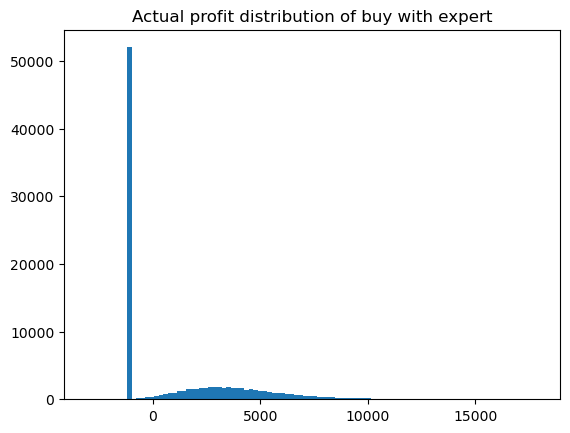

In [238]:
# plot the actual profit distribution
plt.title('Actual profit distribution of buy with expert')
plt.hist(actual_profit, bins=100)

In [239]:
# calculate the expected utility without risk
actual_profit.mean()

1340.9270139195598

In [240]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = actual_profit.mean() 
    print(expected_utility)


cvar is 805.2459076801791
Maximum allowable cvar is -2000.0
1340.9270139195598


In [272]:
# Use monte carlo to simulate the expected utility of buy with expert

buy_threshold = -0.05
result = []
counter = 0
while True:
    price_0 = np.random.normal(0.0025, 0.00327, 100000)
    price_1 = np.random.normal(price_0, 0.00327, 100000)
    price_2 = np.random.normal(price_1, 0.00327, 100000)
    price_3 = np.random.normal(price_2, 0.00327, 100000)
    price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)
    price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
    potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
    potential_profit = potential_profit * share_num  # Scale up to the number of shares
    profit = np.where(price_estimate > buy_threshold, potential_profit, 0)
    # the actual investment profit is the array of actually realized investment profits
    # so everytime price estimate is too much and we decidee not to go with the investment
    # the return should be ignored
    # so only accounting for the times when we actually invest
    # Create mask of where we actually invest based on price estimate
    investment_mask = price_estimate > buy_threshold
    # Only include profits where we actually invested
    # Only include profits where we actually invested
    actual_investment_profit = potential_profit[investment_mask]
    
    # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
    percentile_5 = np.percentile(actual_investment_profit, 5)
    tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
    cvar = np.mean(tail_values)  # This is CVaR
    
    actual_profit = profit - 1000  # Cost of hiring the expert

    if cvar < max_car:
        expected_utility = 0
    else:
        expected_utility = actual_profit.mean()

    print('buy_threshold is', buy_threshold)
    print('cvar is', cvar)
    print('Maximum allowable cvar is', max_car)
    print('expected utility is', expected_utility)

    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


buy_threshold is -0.05
cvar is -5328.40299686179
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0499
cvar is -5358.391875026536
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0498
cvar is -5284.473844865873
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049699999999999994
cvar is -5304.347513261315
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04959999999999999
cvar is -5318.860099026801
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04949999999999999
cvar is -5324.383589469394
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049399999999999986
cvar is -5317.3697076570925
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04929999999999998
cvar is -5339.511618659587
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04919999999999998
cvar is -5315.903488850067
Maximu

In [269]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > 0.023, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > 0.0028

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(actual_investment_profit, 5)
tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

actual_profit = profit - 1000  # Cost of hiring the expert

print(actual_profit.mean())

-996.5454057500004


(array([9.999e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

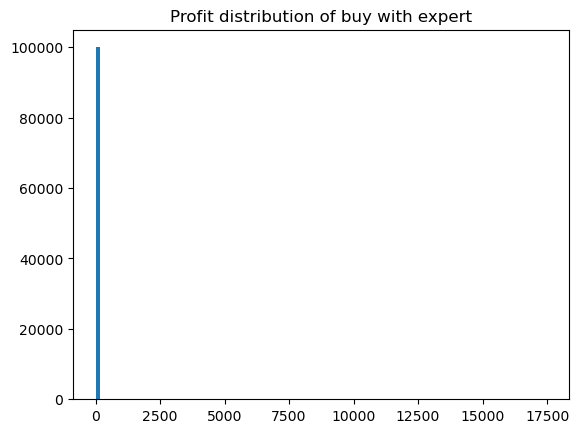

In [262]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)


(array([1.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 8.000e+00,
        7.000e+00, 1.100e+01, 1.500e+01, 1.900e+01, 1.700e+01, 2.800e+01,
        3.500e+01, 5.800e+01, 5.500e+01, 7.100e+01, 1.060e+02, 1.220e+02,
        1.720e+02, 1.920e+02, 2.350e+02, 3.110e+02, 3.350e+02, 3.870e+02,
        4.760e+02, 5.490e+02, 6.540e+02, 8.020e+02, 9.060e+02, 9.820e+02,
        1.135e+03, 1.242e+03, 1.422e+03, 1.543e+03, 1.788e+03, 1.955e+03,
        2.069e+03, 2.274e+03, 2.469e+03, 2.561e+03, 2.736e+03, 2.930e+03,
        2.864e+03, 2.951e+03, 3.119e+03, 3.285e+03, 3.433e+03, 3.272e+03,
        3.373e+03, 3.212e+03, 3.177e+03, 3.139e+03, 3.041e+03, 2.969e+03,
        2.723e+03, 2.725e+03, 2.548e+03, 2.452e+03, 2.304e+03, 2.097e+03,
        1.928e+03, 1.763e+03, 1.567e+03, 1.466e+03, 1.356e+03, 1.225e+03,
        1.021e+03, 9.770e+02, 8.230e+02, 6.950e+02, 6.410e+02, 5.220e+02,
        4.220e+02, 4.050e+02, 3.280e+02, 2.570e+02, 2.470e+02, 2.050e+02,
        1.710e+02, 1.250e+02, 8.700e+0

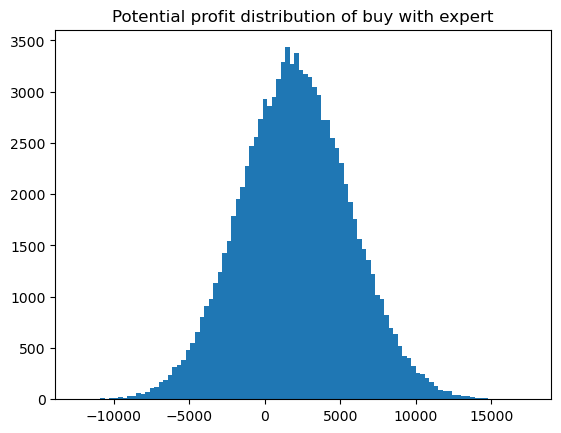

In [263]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)

(array([9.999e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

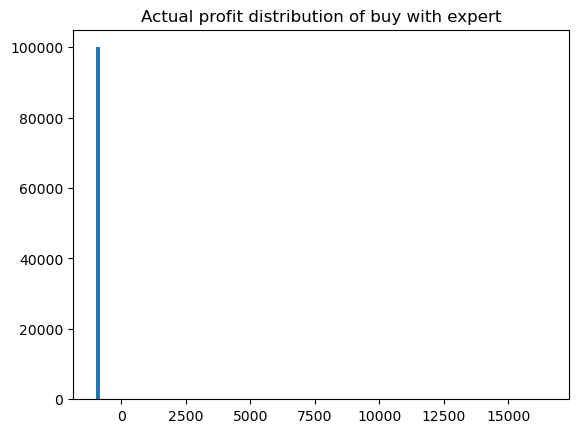

In [264]:
# plot actual profit distribution
plt.title('Actual profit distribution of buy with expert')
plt.hist(actual_profit, bins=100)

In [273]:
# Use monte carlo to simulate the expected utility of buy with expert
buy_threshold = -0.02
result = []
counter = 0
while True:
    for i in range(10):
        price_0 = np.random.normal(0.0025, 0.00327, 100000)
        price_1 = np.random.normal(price_0, 0.00327, 100000)
        price_2 = np.random.normal(price_1, 0.00327, 100000)
        price_3 = np.random.normal(price_2, 0.00327, 100000)

        price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

        price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
        potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
        potential_profit = potential_profit * share_num  # Scale up to the number of shares

        profit = np.where(price_estimate > buy_threshold, potential_profit, 0)

        # the actual investment profit is the array of actually realized investment profits
        # so everytime price estimate is too much and we decidee not to go with the investment
        # the return should be ignored
        # so only accounting for the times when we actually invest
        # Create mask of where we actually invest based on price estimate
        investment_mask = price_estimate > buy_threshold

        # Only include profits where we actually invested
        actual_investment_profit = potential_profit[investment_mask]

        # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
        percentile_5 = np.percentile(actual_investment_profit, 5)
        tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
        cvar = np.mean(tail_values)  # This is CVaR

        actual_profit = profit - 1000  # Cost of hiring the expert

        # calculate the expected utility with risk
        if cvar < max_car:
            expected_utility = 0
        else:
            expected_utility = actual_profit.mean()

        result.append([buy_threshold, expected_utility])

    counter += 1
    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


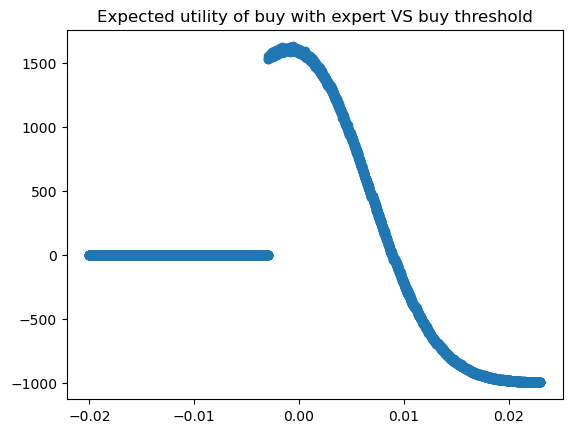

In [275]:
# plot the result as a list of [x, y] pairs
result = np.array(result)

plt.title('Expected utility of buy with expert VS buy threshold')

# plot it as a scatter plot
plt.scatter(result[:, 0], result[:, 1])

# take the average of y values for each x value
unique_xs = np.unique(result[:, 0])




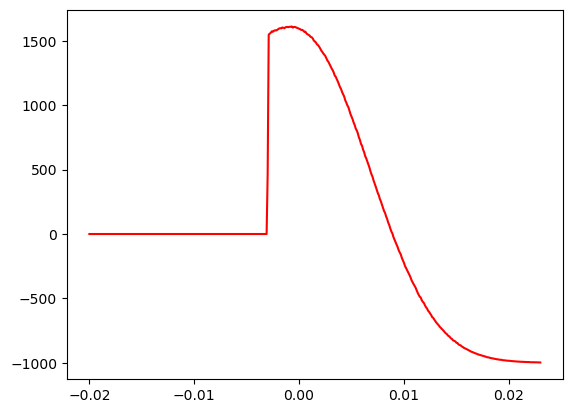

In [276]:
import pandas as pd

df = pd.DataFrame(result, columns=['x', 'y'])

# take the average of y values for each x value
averages = df.groupby('x').mean()

# plot the averages
plt.plot(averages.index, averages['y'], color='red')

In [277]:
# find the x value that maximizes y
max_y = averages['y'].max()
max_x = averages[averages['y'] == max_y].index[0]

print('Maximum expected utility is', max_y, 'when buy threshold is', max_x)


Maximum expected utility is 1611.52087699218 when buy threshold is -0.0007000000000000662
